**CONTEXT**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

**ATTRIBUTES**

price   : price in US dollars ($326--$18,823)

carat   : weight of the diamond (0.2--5.01)

cut     : quality of the cut (Fair, Good, Very Good,
          Premium, Ideal)

color   : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is
          (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x       : length in mm (0--10.74)

y       : width in mm (0--58.9)

z       : depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# loding the csv file as pandas dataframe
data = pd.read_csv('/content/Diamond Price Prediction.csv')

In [ ]:
# Looking at the loaded data
data = data.rename(columns = {"Price(in US dollars)": "Price"})
data.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price,X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape

(53940, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price                     53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price                       0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [ ]:
data.duplicated().sum()

146

In [ ]:
data[data.duplicated()]

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price,X(length),Y(width),Z(Depth)
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(53794, 10)

In [ ]:
data.nunique()

Carat(Weight of Daimond)      273
Cut(Quality)                    5
Color                           7
Clarity                         8
Depth                         184
Table                         127
Price                       11602
X(length)                     554
Y(width)                      552
Z(Depth)                      375
dtype: int64

In [ ]:
data.describe()

,Carat(Weight of Daimond),Depth,Table,Price,X(length),Y(width),Z(Depth)
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Dropping dimentionless diamonds
data = data.drop(data[data["X(length)"]==0].index)
data = data.drop(data[data["Y(width)"]==0].index)
data = data.drop(data[data["Z(Depth)"]==0].index)
data.shape

(53775, 10)

In [ ]:
data.describe()

,Carat(Weight of Daimond),Depth,Table,Price,X(length),Y(width),Z(Depth)
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='Cut(Quality)', ylabel='count'>

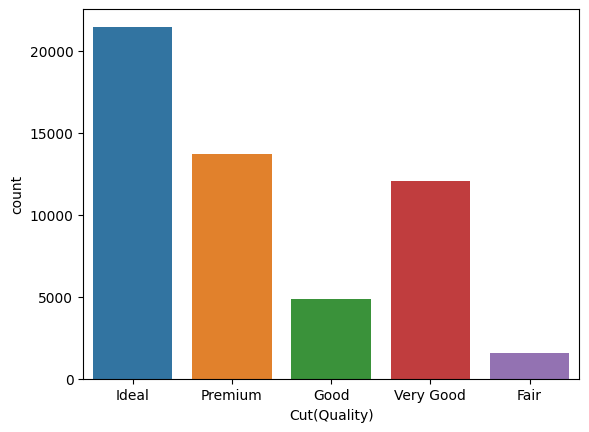

In [ ]:
sns.countplot(x="Cut(Quality)",data=data)

<Axes: xlabel='Clarity', ylabel='count'>

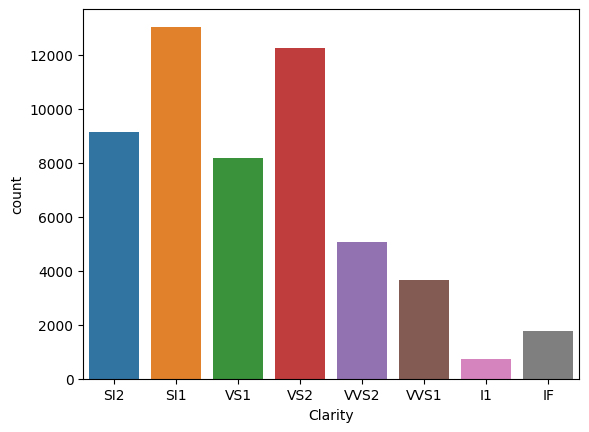

In [ ]:
sns.countplot(x="Clarity",data=data)

<Axes: xlabel='Color', ylabel='count'>

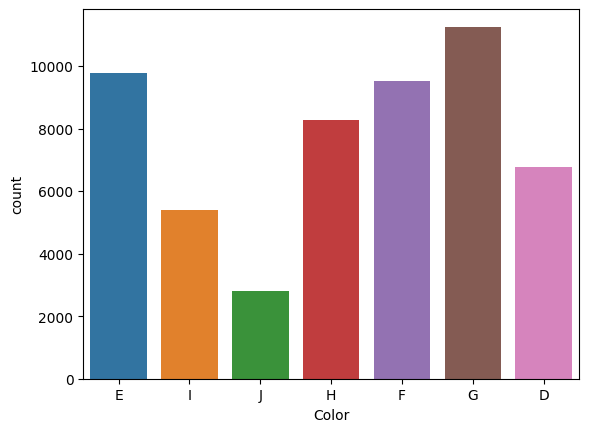

In [ ]:
sns.countplot(x="Color",data=data)

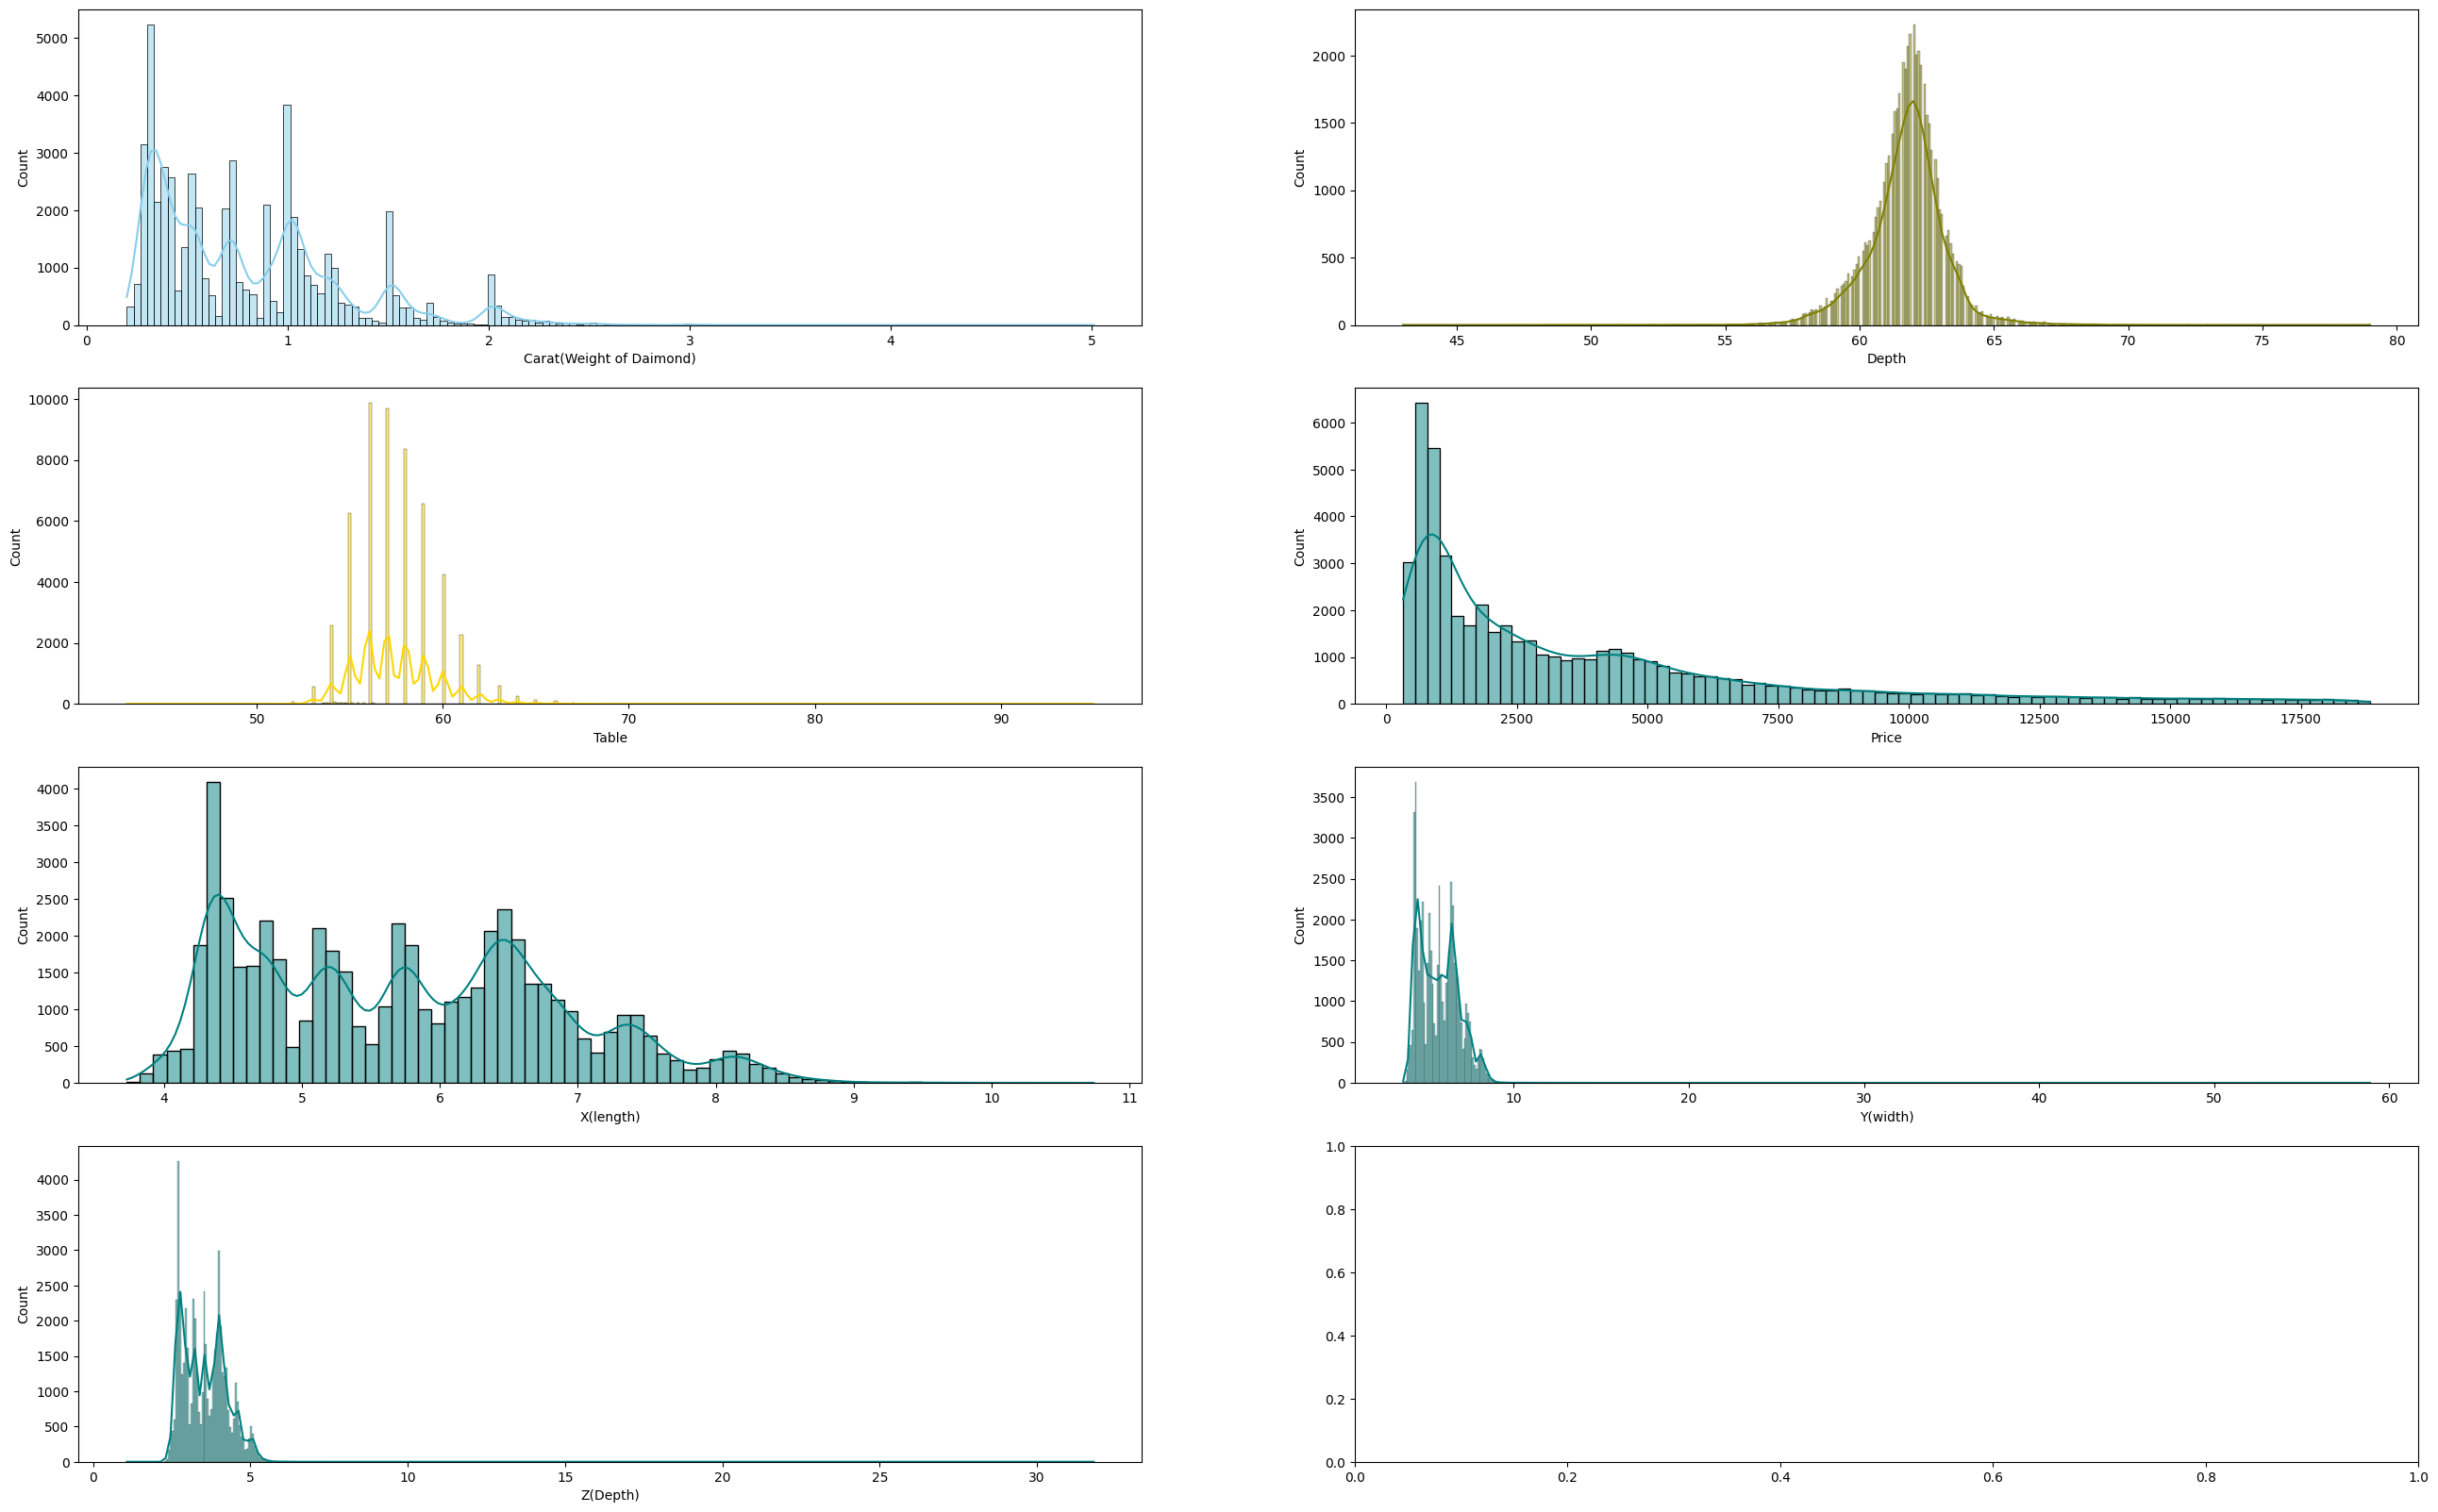

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(32, 20))

sns.histplot(data=data, x="Carat(Weight of Daimond)", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Depth", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="Table", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="Price", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="X(length)", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=data, x="Y(width)", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=data, x="Z(Depth)", kde=True, color="teal", ax=axs[3, 0])

plt.show()

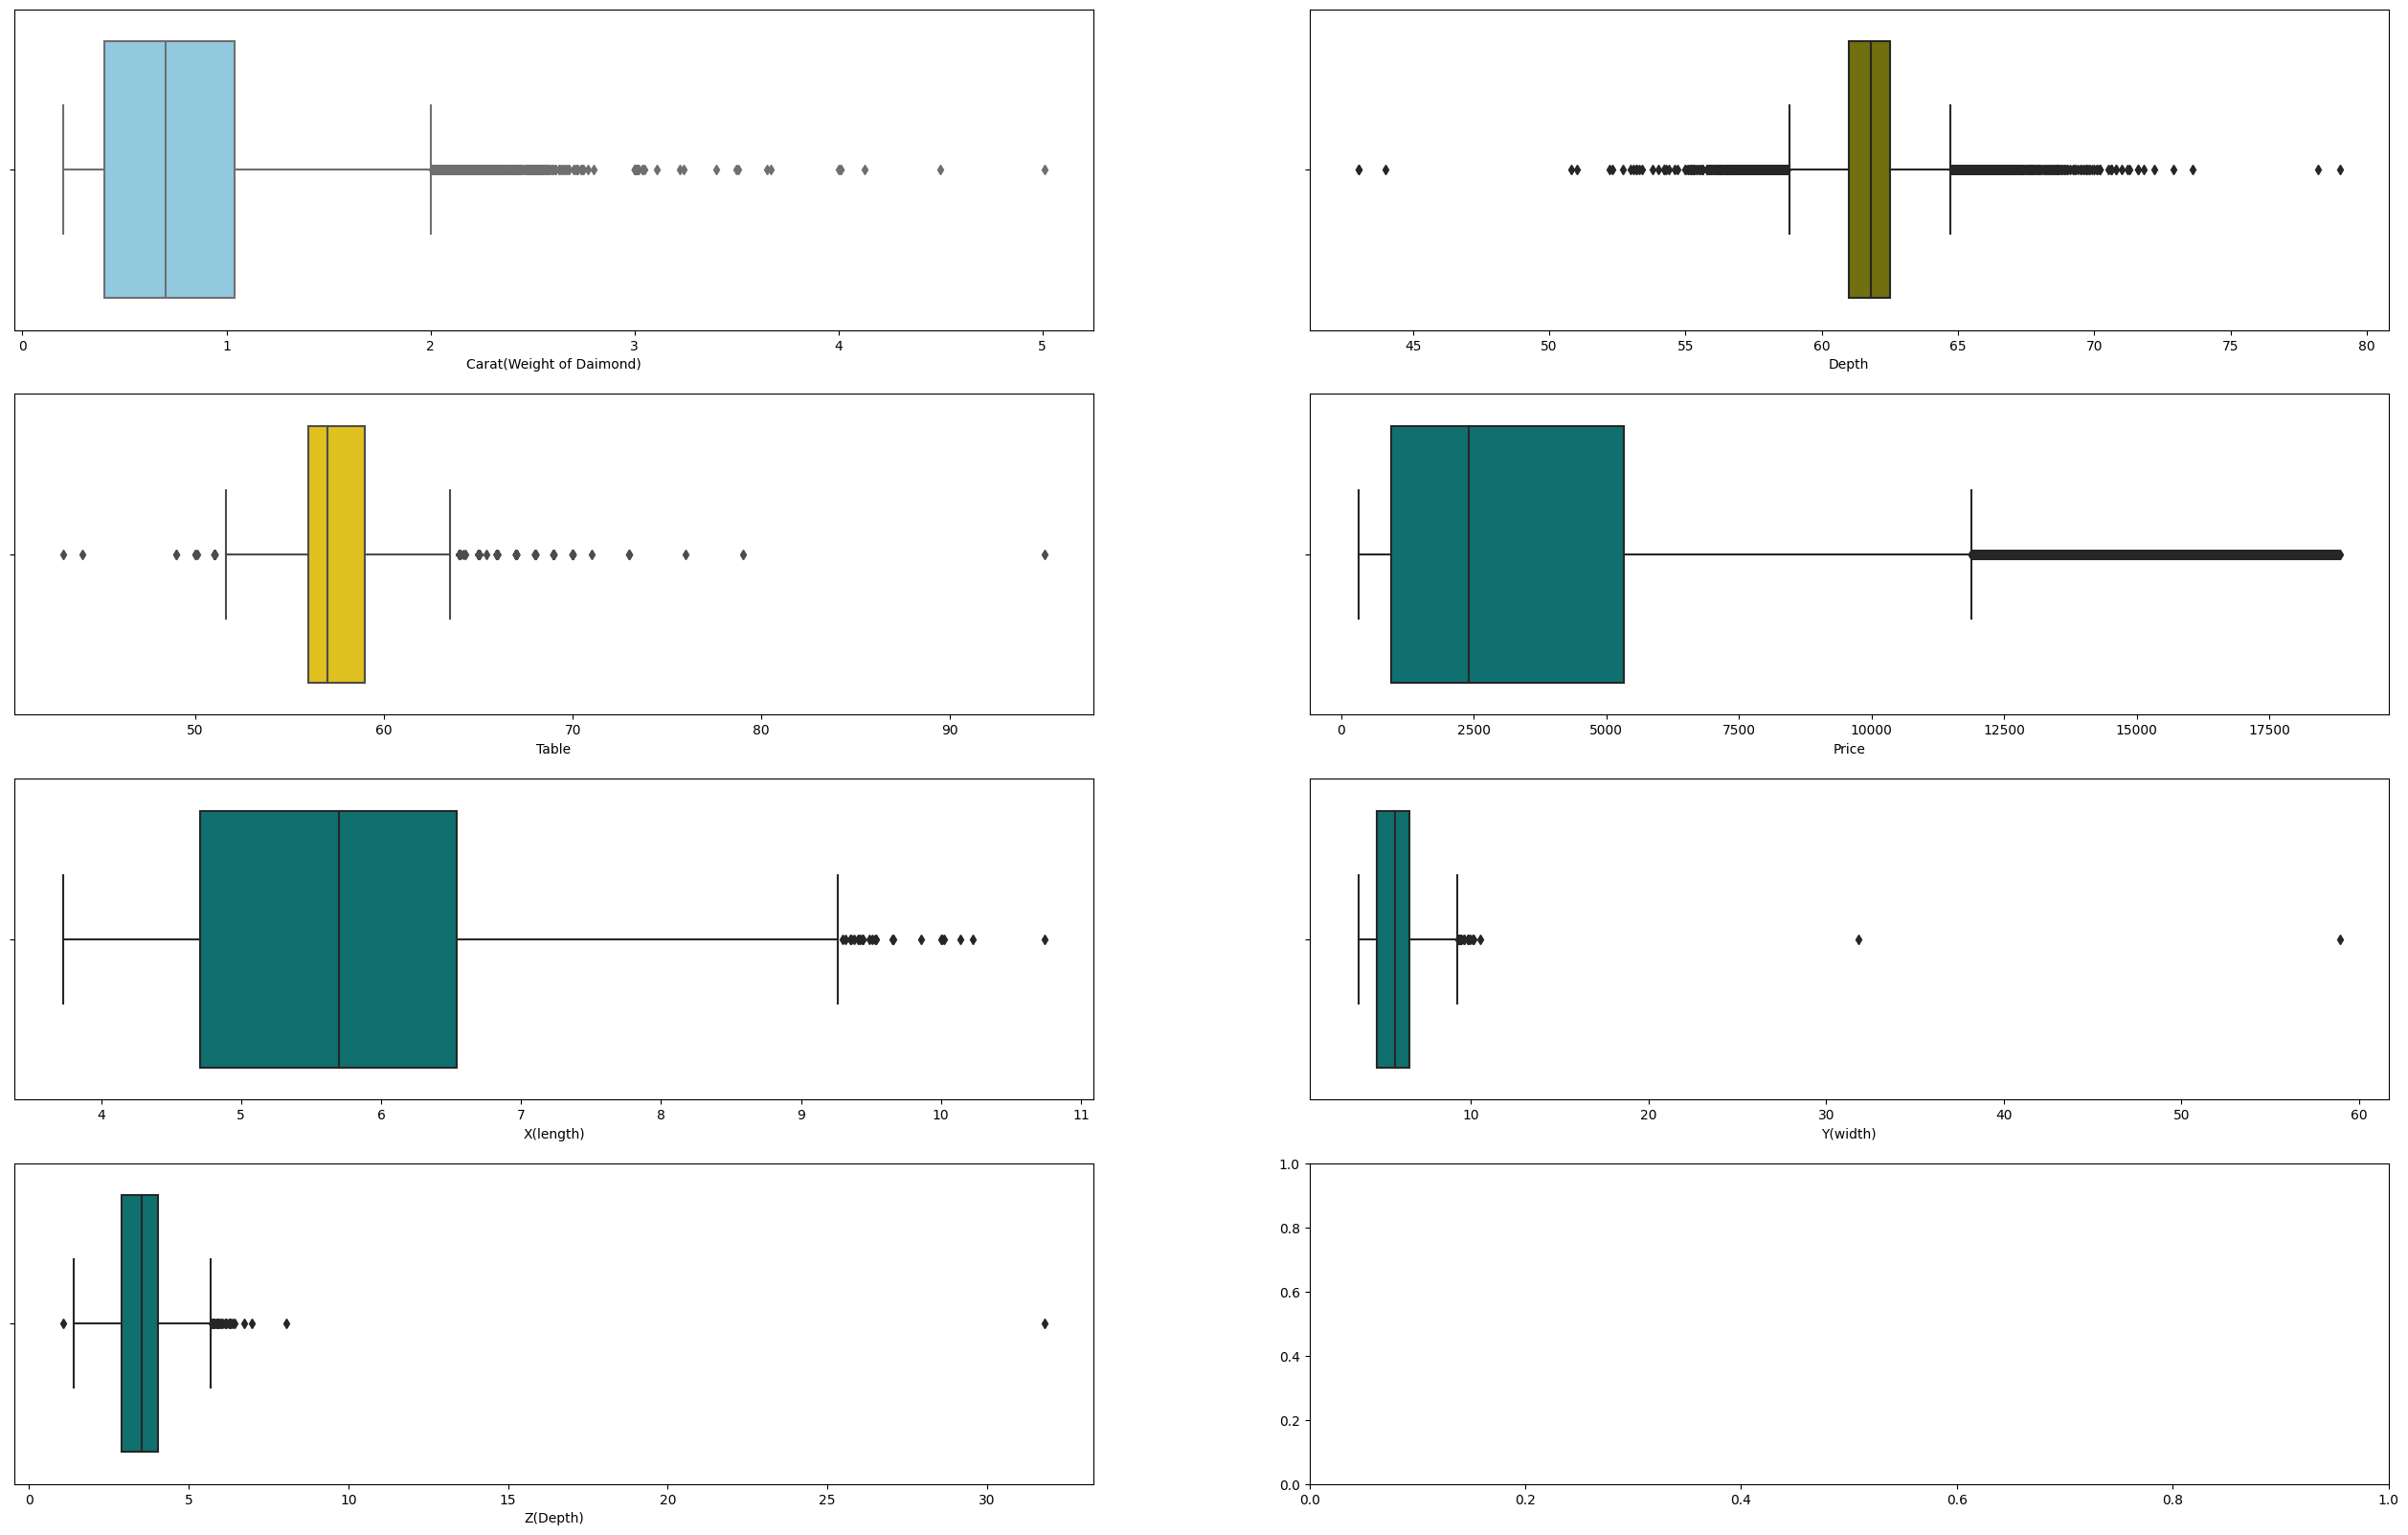

In [ ]:

fig, axs = plt.subplots(4, 2, figsize=(32, 20))

sns.boxplot(data=data, x="Carat(Weight of Daimond)", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=data, x="Depth", color="olive", ax=axs[0, 1])
sns.boxplot(data=data, x="Table", color="gold", ax=axs[1, 0])
sns.boxplot(data=data, x="Price", color="teal", ax=axs[1, 1])
sns.boxplot(data=data, x="X(length)", color="teal", ax=axs[2, 0])
sns.boxplot(data=data, x="Y(width)", color="teal", ax=axs[2, 1])
sns.boxplot(data=data, x="Z(Depth)", color="teal", ax=axs[3, 0])

plt.show()

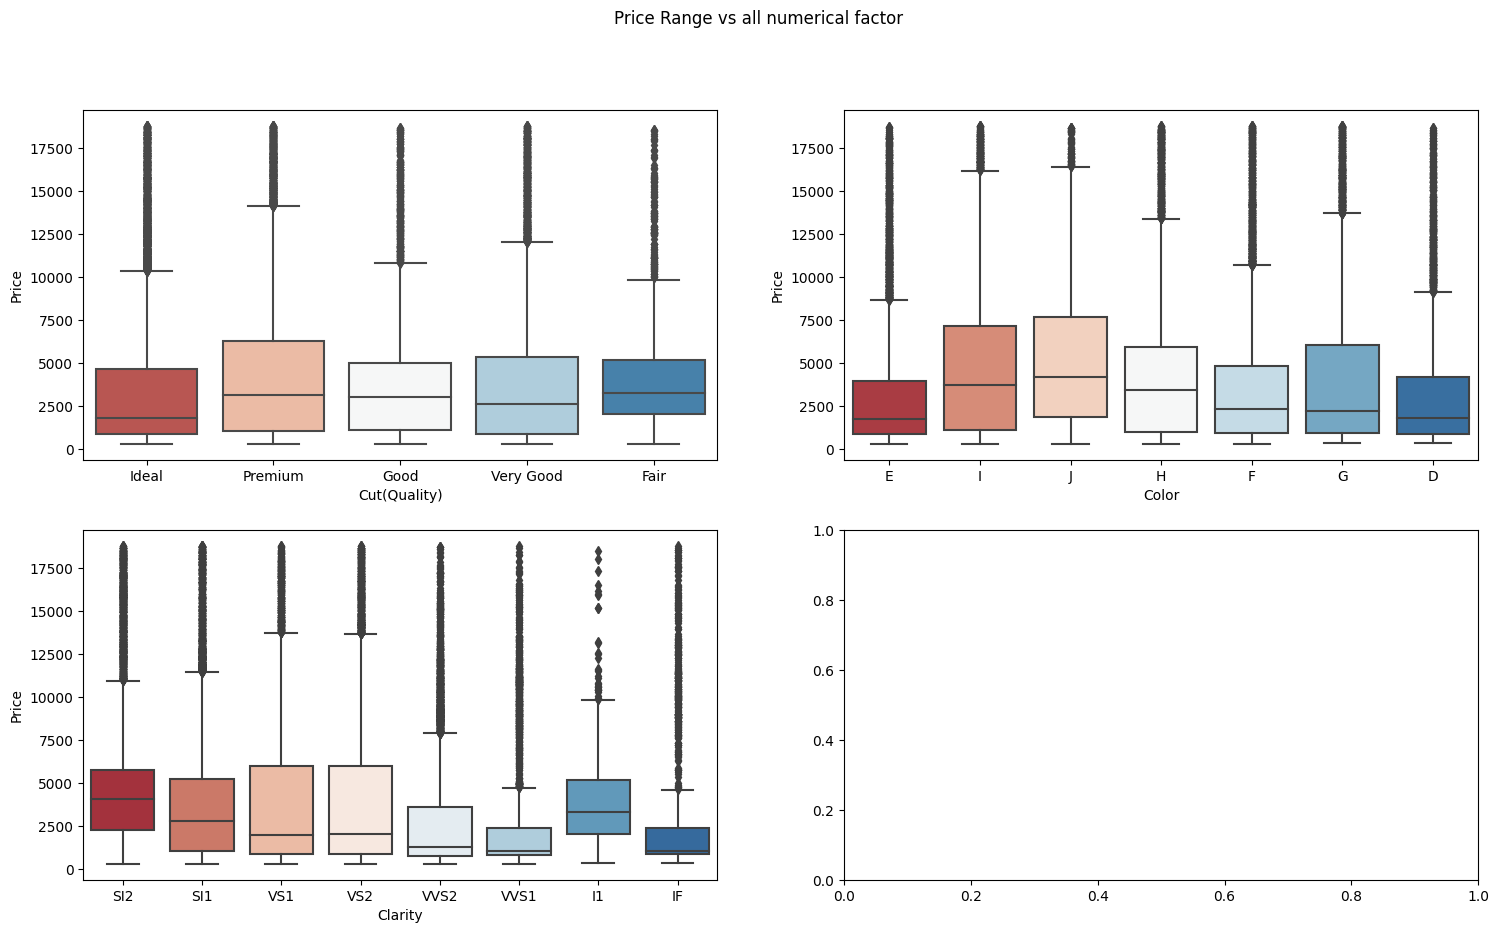

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.boxplot(ax=axes[0, 0], data=data, x='Cut(Quality)', y='Price',palette = "RdBu")
sns.boxplot(ax=axes[0, 1], data=data, x='Color', y='Price',palette = "RdBu")
sns.boxplot(ax=axes[1, 0], data=data, x='Clarity', y='Price',palette = "RdBu")
plt.show()

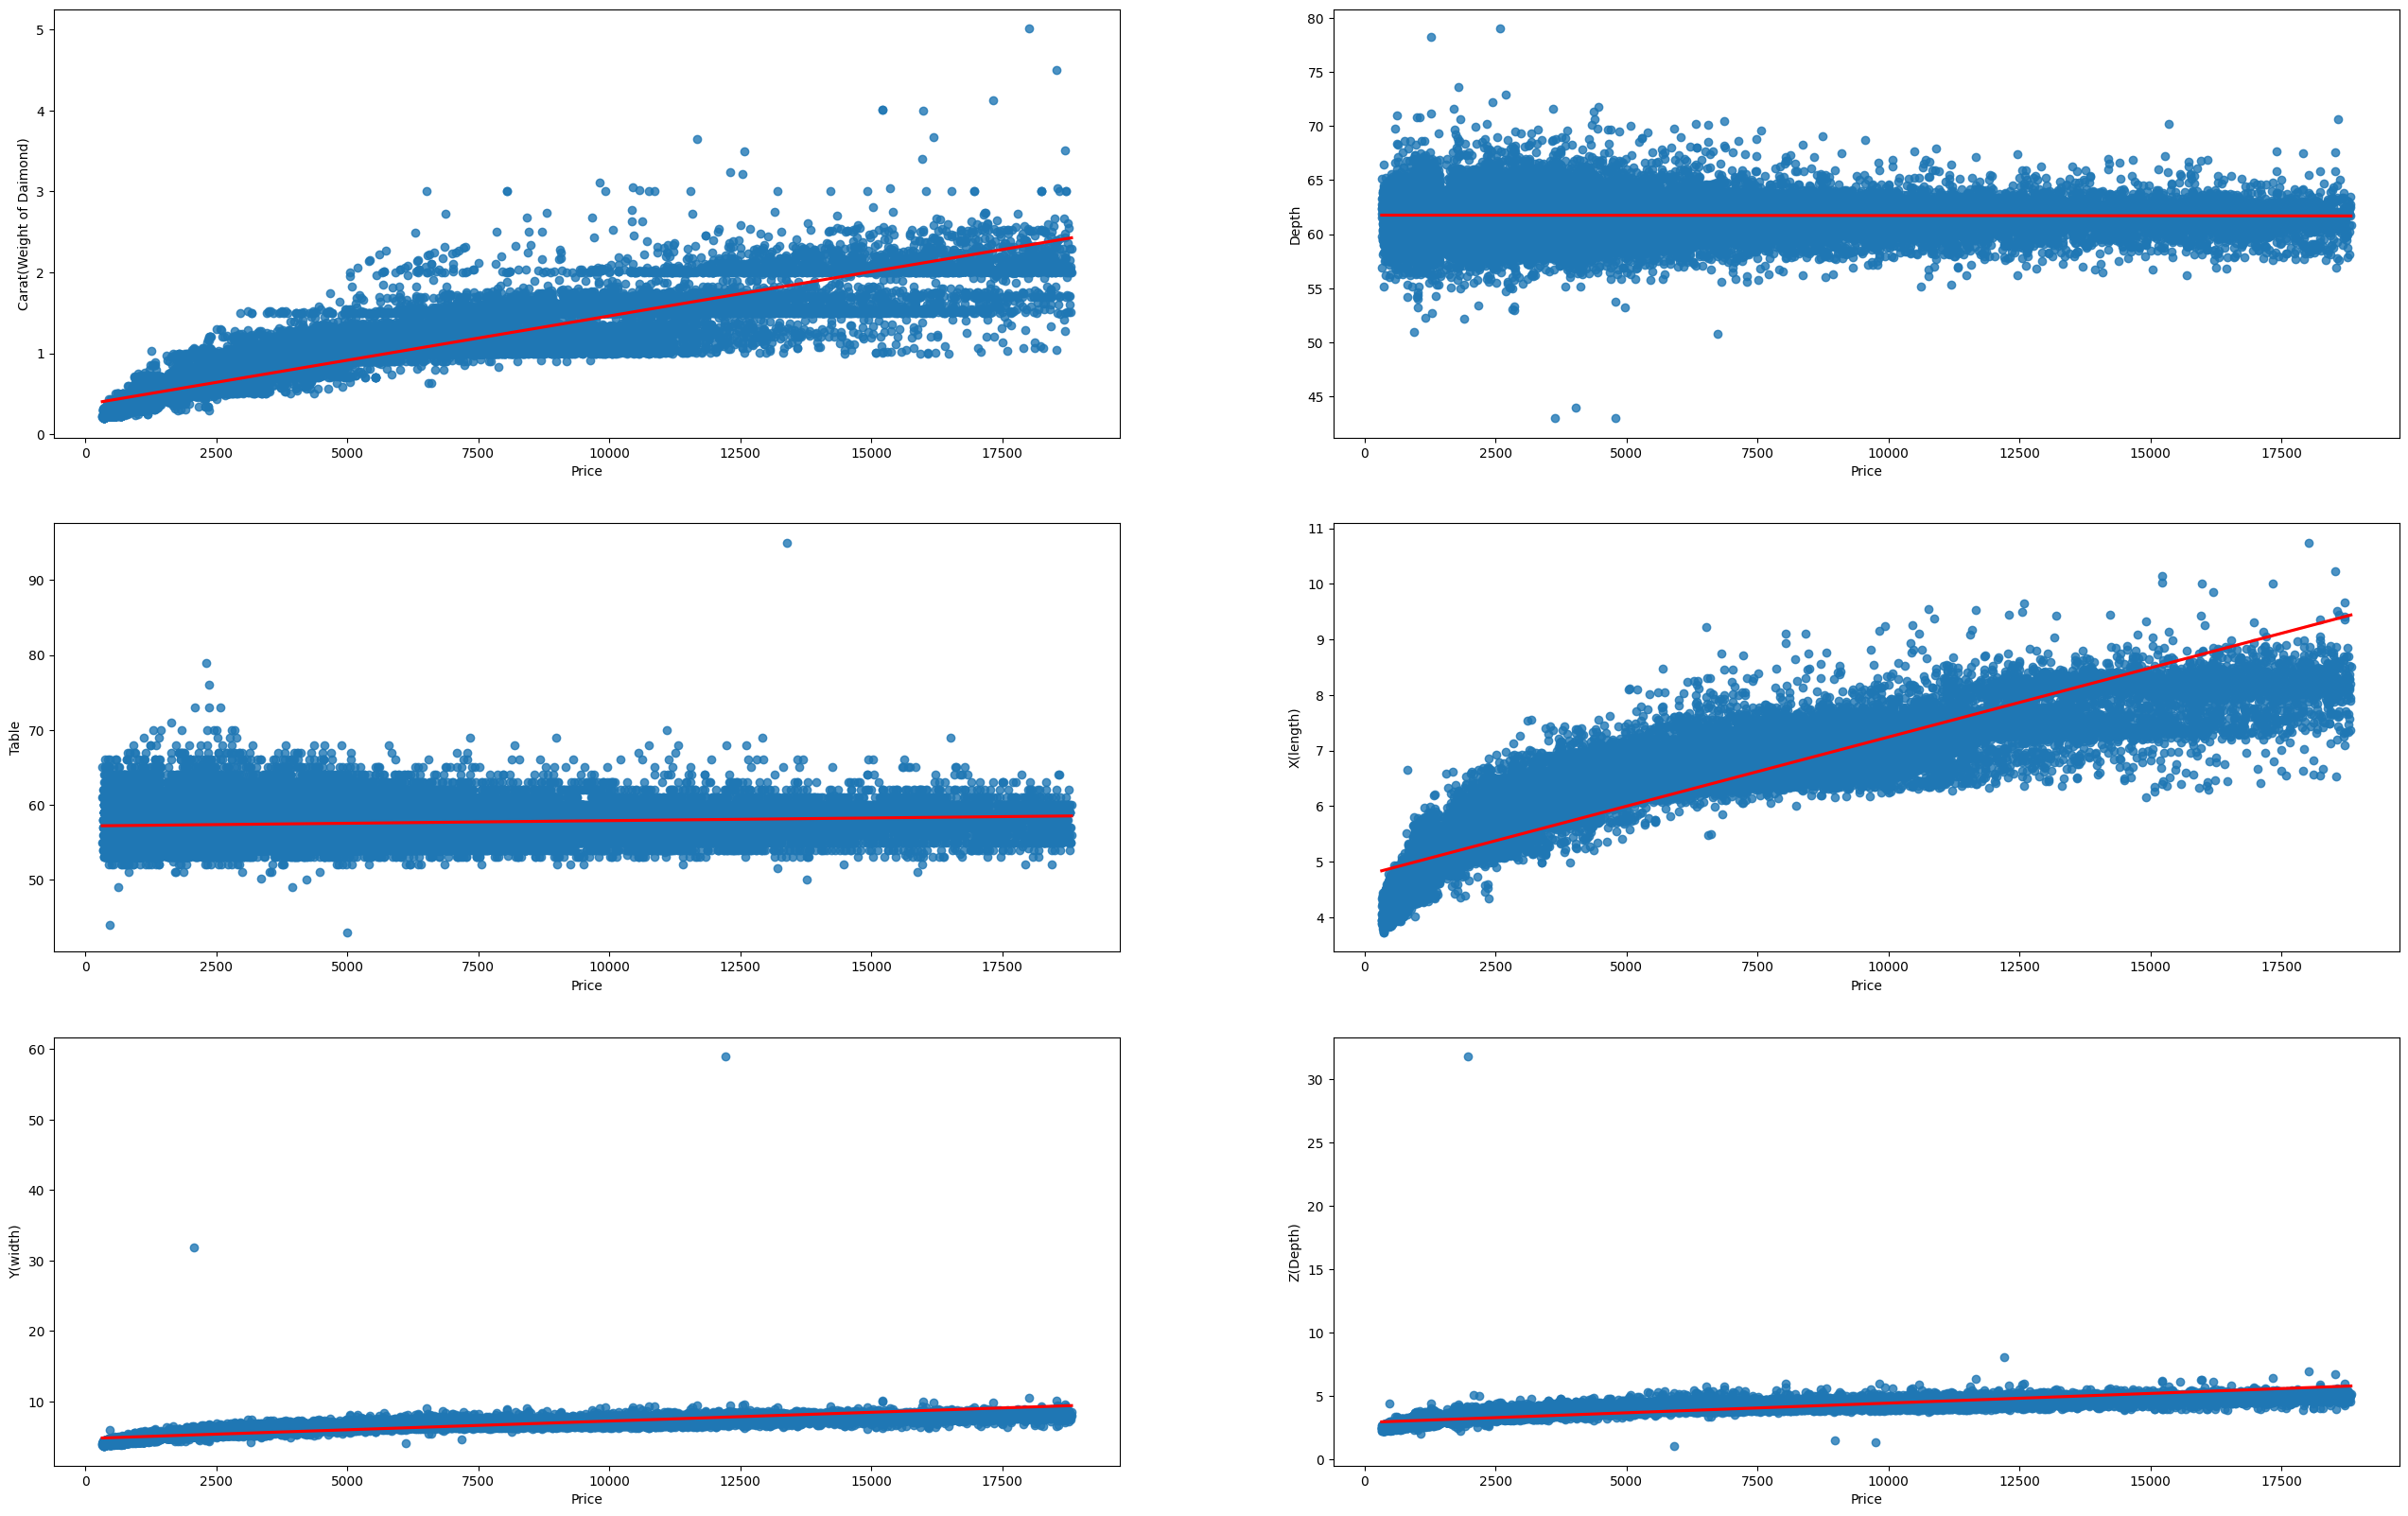

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(32, 20))

sns.regplot(data=data, y="Carat(Weight of Daimond)",x="Price",line_kws={"color": "red"}, ax=axs[0, 0])
sns.regplot(data=data, y="Depth",x="Price",line_kws={"color": "red"}, ax=axs[0, 1])
sns.regplot(data=data, y="Table",x="Price",line_kws={"color": "red"}, ax=axs[1, 0])
sns.regplot(data=data, y="X(length)",x="Price",line_kws={"color": "red"}, ax=axs[1, 1])
sns.regplot(data=data, y="Y(width)",x="Price",line_kws={"color": "red"}, ax=axs[2, 0])
sns.regplot(data=data, y="Z(Depth)",x="Price",line_kws={"color": "red"}, ax=axs[2, 1])

plt.show()

In [ ]:
columns = data[['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price', 'X(length)', 'Y(width)', 'Z(Depth)']]
def replace_outliers_with_mean(data, columns):
    """
    Replace outliers in specified columns of the DataFrame with the mean of non-outlier values.

    Args:
    - data (pandas DataFrame): Input DataFrame.
    - columns (list): List of column names to replace outliers in.

    Returns:
    - DataFrame with outliers replaced by mean of non-outlier values.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_data = data.copy()

    # Iterate through specified columns and replace outliers with column means
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Calculate mean of non-outlier values
        non_outlier_mean = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)][column].mean()

        # Replace outliers with mean of non-outlier values
        cleaned_data[column] = cleaned_data[column].apply(lambda x: non_outlier_mean if (x < lower_bound or x > upper_bound) else x)

    return cleaned_data

# Example usage with the specified columns
cdata = replace_outliers_with_mean(data, ['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price', 'X(length)', 'Y(width)', 'Z(Depth)'])
# print("DataFrame with Outliers Replaced:")
# print(cleaned_data)

In [ ]:
cdata.shape

(53775, 10)

In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    cdata[c1]= label_encoder.fit_transform(cdata[c1])
    cdata[c1].unique()
LABEL_ENCODING("Cut(Quality)")
LABEL_ENCODING("Color")
LABEL_ENCODING("Clarity")
cdata

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price,X(length),Y(width),Z(Depth)
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


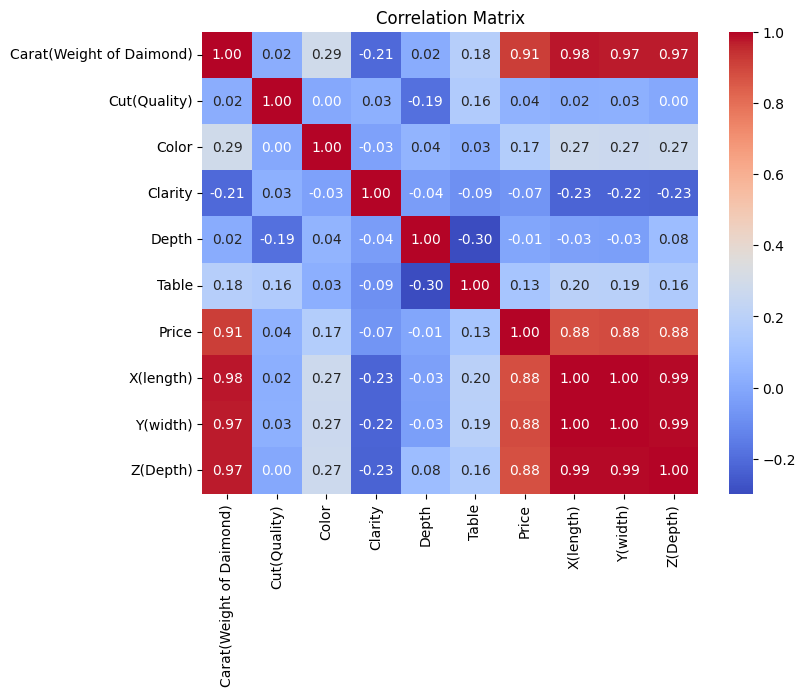

In [ ]:
correlation_matrix = cdata.corr()

# Create a heatmap using Seaborn to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cdata['volume']= cdata['X(length)']*cdata['Y(width)']*cdata["Z(Depth)"]
cdata=cdata.drop(['X(length)','Y(width)','Z(Depth)'], axis=1)
cdata.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price,volume
0,0.23,2,1,3,61.5,55.0,326.0,38.202030
1,0.21,3,1,2,59.8,61.0,326.0,34.505856
2,0.23,1,1,4,56.9,65.0,327.0,38.076885
3,0.29,3,5,5,62.4,58.0,334.0,46.724580
4,0.31,1,6,3,63.3,58.0,335.0,51.917250


<Axes: >

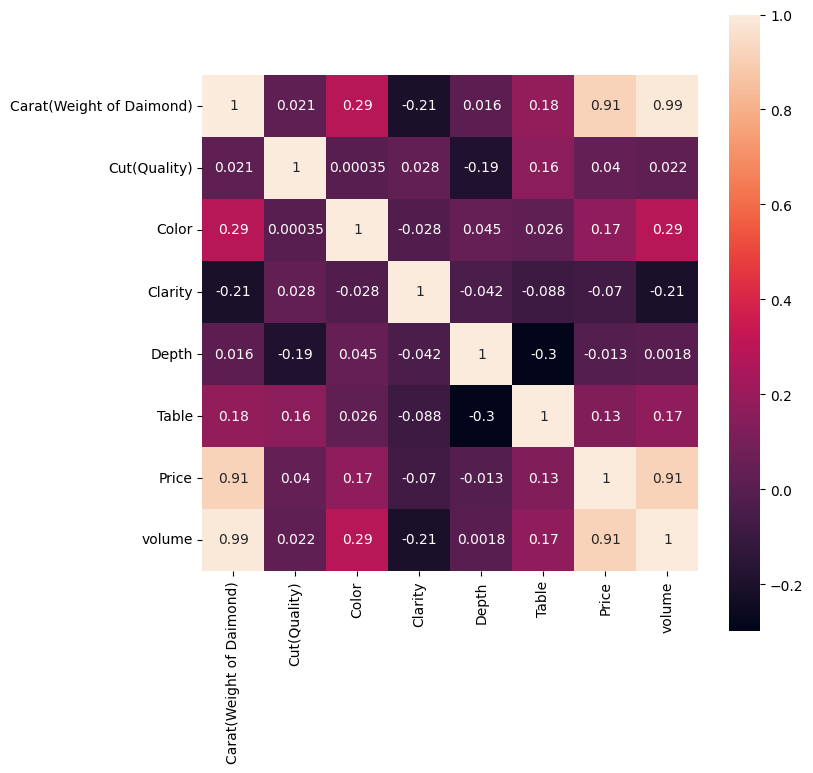

In [ ]:
corr = cdata.corr()
plt.figure(figsize = (8,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

It is observed that the independent variable volume and carat have a strong correlation. So volume column is dropped before regression is implemented.

In [ ]:
cdata=cdata.drop(['volume'], axis=1)
cdata.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price
0,0.23,2,1,3,61.5,55.0,326.0
1,0.21,3,1,2,59.8,61.0,326.0
2,0.23,1,1,4,56.9,65.0,327.0
3,0.29,3,5,5,62.4,58.0,334.0
4,0.31,1,6,3,63.3,58.0,335.0


In [ ]:
def one_hot_encode_columns(data, columns_to_encode):
    encoded_data = data.copy()

    # Perform one-hot encoding for each specified column
    for column in columns_to_encode:
        # Perform one-hot encoding for the current column
        encoded_column = pd.get_dummies(encoded_data[column], prefix=column)

        # Concatenate the one-hot encoded columns to the original DataFrame
        encoded_data = pd.concat([encoded_data, encoded_column], axis=1)

        # Drop the original column from the DataFrame
        encoded_data.drop(column, axis=1, inplace=True)

    return encoded_data

# Specify columns to be one-hot encoded
columns_to_encode = ['Cut(Quality)','Color', 'Clarity']

# Apply the one-hot encoding function to the specified columns
cdata = one_hot_encode_columns(cdata, columns_to_encode)

# Output the DataFrame after one-hot encoding
print(cdata)

       Carat(Weight of Daimond)  Depth  Table   Price  Cut(Quality)_0  \
0                          0.23   61.5   55.0   326.0               0   
1                          0.21   59.8   61.0   326.0               0   
2                          0.23   56.9   65.0   327.0               0   
3                          0.29   62.4   58.0   334.0               0   
4                          0.31   63.3   58.0   335.0               0   
...                         ...    ...    ...     ...             ...   
53935                      0.72   60.8   57.0  2757.0               0   
53936                      0.72   63.1   55.0  2757.0               0   
53937                      0.70   62.8   60.0  2757.0               0   
53938                      0.86   61.0   58.0  2757.0               0   
53939                      0.75   62.2   55.0  2757.0               0   

       Cut(Quality)_1  Cut(Quality)_2  Cut(Quality)_3  Cut(Quality)_4  \
0                   0               1             

In [ ]:
X = cdata.drop('Price',axis=1)
y = cdata['Price']
from sklearn.model_selection import train_test_split #split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43020, 23)
(10755, 23)
(43020,)
(10755,)


In [ ]:
model = LinearRegression() #Create a linear regression model
model.fit(X_train,y_train) #Fit the data

LinearRegression()

In [ ]:
train1_score=model.score(X_train,y_train)
print("Train score:",train1_score)

Train score: 0.8968693797781685


In [ ]:
y_test_predict = model.predict(X_test)

In [ ]:
test1_score=model.score(X_test,y_test)
print("Accuray:",test1_score)

Accuray: 0.8911484312599102


In [ ]:
cdata.describe()

,Carat(Weight of Daimond),Depth,Table,Price,Cut(Quality)_0,Cut(Quality)_1,Cut(Quality)_2,Cut(Quality)_3,Cut(Quality)_4,Color_0,...,Color_5,Color_6,Clarity_0,Clarity_1,Clarity_2,Clarity_3,Clarity_4,Clarity_5,Clarity_6,Clarity_7
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,...,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.795770,61.740334,57.451728,3897.803702,0.029698,0.090897,0.399535,0.255453,0.224417,0.125597,...,0.100530,0.052106,0.013705,0.033175,0.242306,0.170005,0.151650,0.227336,0.067801,0.094021
std,0.468305,1.337471,2.207578,3923.827673,0.169754,0.287466,0.489807,0.436120,0.417201,0.331398,...,0.300708,0.222243,0.116266,0.179096,0.428482,0.375640,0.358685,0.419115,0.251406,0.291861
min,0.200000,56.500000,49.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5290.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.800000,67.000000,68.000000,18443.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will use the feature selection method by backward elimination.It is used to remove those features that do not have a significant effect on the dependent variable. We need to select the significance level to stay in the model (SL=0.05) Now we will remove all those predictor variable from our data which has high p value.

In [ ]:
y = cdata["Price"]
X = cdata.drop("Price",axis=1)


In [ ]:
xo=[1]*53775
X.insert(0, 'const', xo)

In [ ]:
import statsmodels.api as sm
ols1 = sm.OLS(endog=y,exog=X).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.309e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:28:53   Log-Likelihood:            -4.6050e+05
No. Observations:               53775   AIC:                         9.210e+05
Df Residuals:                   53754   BIC:                         9.212e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1201.6715    280.180     -4.289      0.000   -1750.826    -652.517
Carat(Weight of Daimond)  8724.6018     13.380    652.084      0.000    8698.378    8750.826
Depth                       -8.0943      4.759     -1.701      0.089     -17.423       1.234
Table                      -21.0000      3.304     -6.356      0.000     -27.476     -14.524
Cut(Quality)_0            -820.6770     69.866    -11.746      0.000    -957.615    -683.739
Cut(Quality)_1            -255.3778     60.735     -4.205      0.000    -374.418    -136.337
Cut(Quality)_2              11.5824     50.252      0.230      0.818     -86.912     110.077
Cut(Quality)_3             -46.8960     55.113     -0.851      0.395    -154.918      61.126
Cut(Quality)_4             -90.3031     55.615     -1.624      0.104    -199.309      18.702
Color_0                    625.3198     42.355     14.764      0.000     542.304     708.336
Color_1                    419.7661     41.704     10.065      0.000     338.026     501.506
Color_2                    302.7593     41.587      7.280      0.000     221.249     384.270
Color_3                    113.7268     41.584      2.735      0.006      32.222     195.232
Color_4                   -336.5996     42.289     -7.960      0.000    -419.486    -253.713
Color_5                   -732.1641     43.439    -16.855      0.000    -817.305    -647.023
Color_6                  -1594.4798     46.017    -34.650      0.000   -1684.673   -1504.286
Clarity_0                -3227.0564     55.365    -58.287      0.000   -3335.572   -3118.541
Clarity_1                 1319.6600     43.964     30.017      0.000    1233.489    1405.831
Clarity_2                 -479.8421     37.827    -12.685      0.000    -553.983    -405.701
Clarity_3                -1369.9360     38.311    -35.758      0.000   -1445.026   -1294.846
Clarity_4                  483.9836     37.851     12.786      0.000     409.795     558.173
Clarity_5                  164.6873     37.539      4.387      0.000      91.110     238.265
Clarity_6                  998.2514     40.284     24.780      0.000     919.295    1077.208
Clarity_7                  908.5807     39.096     23.240      0.000     831.952     985.209
==============================================================================
Omnibus:                    16330.150   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1336213.743
Skew:                           0.527   Prob(JB):                         0.00
Kurtosis:                      27.398   Cond. No.                     1.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [ ]:
d1=cdata.drop("Depth",axis=1)
d2=d1.drop("Cut(Quality)_2",axis=1)
d3=d2.drop("Cut(Quality)_3",axis=1)
d4=d3.drop("Cut(Quality)_4",axis=1)
y1=d4['Price']
X1=d4.drop('Price', axis=1)
xo=[1]*53775
X1.insert(0, 'const', xo)
ols2= sm.OLS(endog=y1,exog=X1).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.714e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:29:05   Log-Likelihood:            -4.6052e+05
No. Observations:               53775   AIC:                         9.211e+05
Df Residuals:                   53757   BIC:                         9.212e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1349.1049    116.067    -11.624      0.000   -1576.596   -1121.614
Carat(Weight of Daimond)  8722.6688     13.372    652.296      0.000    8696.459    8748.879
Table                      -26.9306      2.584    -10.421      0.000     -31.996     -21.865
Cut(Quality)_0            -794.9635     33.110    -24.010      0.000    -859.859    -730.068
Cut(Quality)_1            -220.4635     19.443    -11.339      0.000    -258.572    -182.355
Color_0                    606.3155     22.017     27.539      0.000     563.163     649.468
Color_1                    398.6958     20.906     19.071      0.000     357.720     439.671
Color_2                    281.8229     20.698     13.616      0.000     241.255     322.391
Color_3                     93.3601     20.088      4.647      0.000      53.987     132.733
Color_4                   -358.4171     21.161    -16.938      0.000    -399.893    -316.941
Color_5                   -752.9447     23.055    -32.659      0.000    -798.132    -707.757
Color_6                  -1617.9375     27.603    -58.616      0.000   -1672.039   -1563.836
Clarity_0                -3246.6653     45.559    -71.262      0.000   -3335.962   -3157.369
Clarity_1                 1312.8225     30.668     42.807      0.000    1252.712    1372.933
Clarity_2                 -505.0635     19.583    -25.791      0.000    -543.446    -466.681
Clarity_3                -1393.7192     21.259    -65.560      0.000   -1435.387   -1352.052
Clarity_4                  465.1564     20.508     22.681      0.000     424.960     505.353
Clarity_5                  144.7813     19.390      7.467      0.000     106.776     182.787
Clarity_6                  983.1263     24.538     40.065      0.000     935.031    1031.221
Clarity_7                  890.4565     22.480     39.611      0.000     846.395     934.518
==============================================================================
Omnibus:                    16315.407   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1327575.589
Skew:                           0.528   Prob(JB):                         0.00
Kurtosis:                      27.318   Cond. No.                     4.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now we have only those predictors whose p-value is less than 0.05 i.e effect on the dependent variable is significant.Now we will check all the assumptions of the linear regresssion model.

<Axes: >

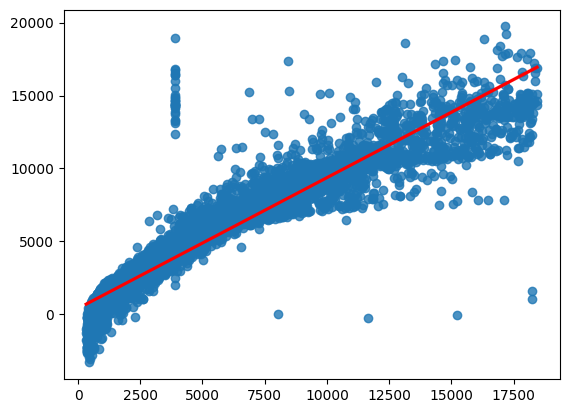

In [ ]:
# checking linearity of the model???
y_test=np.array(y_test)
sns.regplot(x = y_test, y = y_test_predict, line_kws={"color": "red"})

In [ ]:
# checking multicollinearity???
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

#vif_results = calculate_vif_wc(data)
#print(vif_results)

In [ ]:
d5 = d4.drop("Price", axis =1)
vif_results = calculate_vif(sm.add_constant(d5))
print(vif_results)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                    Variable       VIF
0                      const  0.000000
1   Carat(Weight of Daimond)  1.311921
2                      Table  1.088750
3             Cut(Quality)_0  1.056798
4             Cut(Quality)_1  1.045074
5                    Color_0       inf
6                    Color_1       inf
7                    Color_2       inf
8                    Color_3       inf
9                    Color_4       inf
10                   Color_5       inf
11                   Color_6       inf
12                 Clarity_0       inf
13                 Clarity_1       inf
14                 Clarity_2       inf
15                 Clarity_3       inf
16                 Clarity_4       inf
17                 Clarity_5       inf
18                 Clarity_6       inf
19                 Clarity_7       inf


In [ ]:
d6 = d5.drop("Color_3", axis =1)
vif_results = calculate_vif(sm.add_constant(d6))
print(vif_results)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                    Variable       VIF
0                      const  0.000000
1   Carat(Weight of Daimond)  1.311921
2                      Table  1.088750
3             Cut(Quality)_0  1.056798
4             Cut(Quality)_1  1.045074
5                    Color_0  1.453668
6                    Color_1  1.572395
7                    Color_2  1.531225
8                    Color_4  1.491232
9                    Color_5  1.365119
10                   Color_6  1.226462
11                 Clarity_0       inf
12                 Clarity_1       inf
13                 Clarity_2       inf
14                 Clarity_3       inf
15                 Clarity_4       inf
16                 Clarity_5       inf
17                 Clarity_6       inf
18                 Clarity_7       inf


In [ ]:
d7 = d6.drop("Clarity_3", axis =1)
vif_results = calculate_vif(sm.add_constant(d7))
print(vif_results)

                    Variable         VIF
0                      const  740.460766
1   Carat(Weight of Daimond)    1.311921
2                      Table    1.088750
3             Cut(Quality)_0    1.056798
4             Cut(Quality)_1    1.045074
5                    Color_0    1.453668
6                    Color_1    1.572395
7                    Color_2    1.531225
8                    Color_4    1.491232
9                    Color_5    1.365119
10                   Color_6    1.226462
11                 Clarity_0    1.094506
12                 Clarity_1    1.242221
13                 Clarity_2    1.895429
14                 Clarity_4    1.726719
15                 Clarity_5    1.914439
16                 Clarity_6    1.443811
17                 Clarity_7    1.534548


In [ ]:
d5 = d4.drop("Color_3", axis=1)
y1=d5['Price']
X1=d5.drop('Price', axis=1)
xo=[1]*53775
X1.insert(0, 'const', xo)
ols3= sm.OLS(endog=y1,exog=X1).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.714e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:42:03   Log-Likelihood:            -4.6052e+05
No. Observations:               53775   AIC:                         9.211e+05
Df Residuals:                   53757   BIC:                         9.212e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1266.1182    130.883     -9.674      0.000   -1522.650   -1009.586
Carat(Weight of Daimond)  8722.6688     13.372    652.296      0.000    8696.459    8748.879
Table                      -26.9306      2.584    -10.421      0.000     -31.996     -21.865
Cut(Quality)_0            -794.9635     33.110    -24.010      0.000    -859.859    -730.068
Cut(Quality)_1            -220.4635     19.443    -11.339      0.000    -258.572    -182.355
Color_0                    512.9554     19.891     25.788      0.000     473.968     551.942
Color_1                    305.3357     17.776     17.177      0.000     270.495     340.177
Color_2                    188.4628     17.727     10.632      0.000     153.718     223.207
Color_4                   -451.7773     18.511    -24.406      0.000    -488.059    -415.495
Color_5                   -846.3048     21.243    -39.839      0.000    -887.942    -804.668
Color_6                  -1711.2976     27.245    -62.813      0.000   -1764.697   -1657.898
Clarity_0                -3236.2919     46.296    -69.905      0.000   -3327.032   -3145.552
Clarity_1                 1323.1959     31.431     42.098      0.000    1261.590    1384.802
Clarity_2                 -494.6901     21.084    -23.462      0.000    -536.016    -453.365
Clarity_3                -1383.3459     22.669    -61.022      0.000   -1427.778   -1338.914
Clarity_4                  475.5297     21.819     21.794      0.000     432.764     518.295
Clarity_5                  155.1547     20.840      7.445      0.000     114.309     196.001
Clarity_6                  993.4996     25.590     38.823      0.000     943.342    1043.657
Clarity_7                  900.8299     23.625     38.131      0.000     854.525     947.135
==============================================================================
Omnibus:                    16315.407   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1327575.589
Skew:                           0.528   Prob(JB):                         0.00
Kurtosis:                      27.318   Cond. No.                     3.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X = d5.drop('Price',axis=1)
y = d5['Price']
from sklearn.model_selection import train_test_split #split the data set
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(43020, 18)
(10755, 18)
(43020,)
(10755,)


In [ ]:
model_1 = LinearRegression() #Create a linear regression model
model_1.fit(X_train_1,y_train_1) #Fit the data

LinearRegression()

In [ ]:
train_1_score=model_1.score(X_train_1,y_train_1)
print("Train score_1:",train_1_score)

Train score_1: 0.8967511252952582


In [ ]:
y_test_1_predict = model_1.predict(X_test_1)

In [ ]:
test_1_score=model_1.score(X_test_1,y_test_1)
print("R^2 value:",test_1_score)

R^2 value: 0.8911563743987143


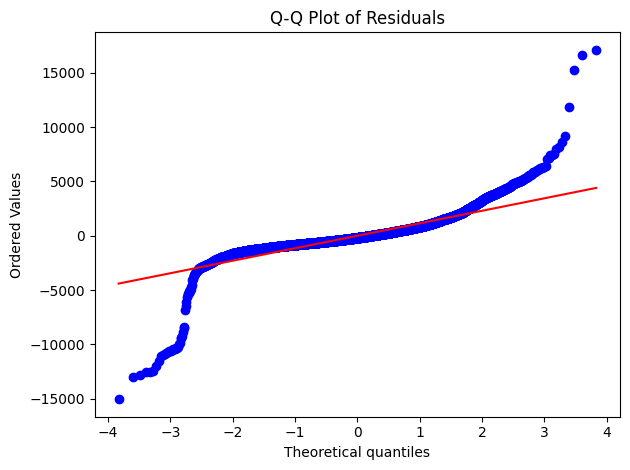

In [ ]:
# assumptions regarding residuals???
y_test_predict_1 = model_1.predict(X_test_1)
residuals_1 = y_test_1 - y_test_predict_1
stats.probplot(residuals_1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()